# Case Study

You are a data scientist at a top recruiting firm. Predict job salary based on different attributes to help the company more accurately/profitably determine compensation.

To start, load in the data and poke around. Try to determine the most common jobs in the data set, and use linear regression to predict the 2015 salary.


In [1]:
# Some python imports you may find useful
% matplotlib inline

from collections import defaultdict
import datetime

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model

In [2]:
# Load the the salary data
df = pd.read_csv("Salaries.csv")

df.head()

/home/user/repos/anaconda3/envs/py2.7/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


## Exploratory Analysis

Use `value_counts` to look at the distribution of job types. Pick a job type and investigate further. For example, make a histogram of salaries and compute the mean and median per year.

In [3]:
counts = df["JobTitle"].value_counts()
print counts
mask = (df["JobTitle"] == "FIREFIGHTER") | (df["JobTitle"] == "Firefighter")
len(df[mask])

Transit Operator                                      7036
Special Nurse                                         4389
Registered Nurse                                      3736
Public Svc Aide-Public Works                          2518
Police Officer 3                                      2421
Custodian                                             2418
TRANSIT OPERATOR                                      2388
Firefighter                                           2359
Recreation Leader                                     1971
Patient Care Assistant                                1945
Deputy Sheriff                                        1933
Police Officer                                        1476
SPECIAL NURSE                                         1402
Public Service Trainee                                1328
REGISTERED NURSE                                      1219
Police Officer 2                                      1141
Attorney (Civil/Criminal)                             11

3153

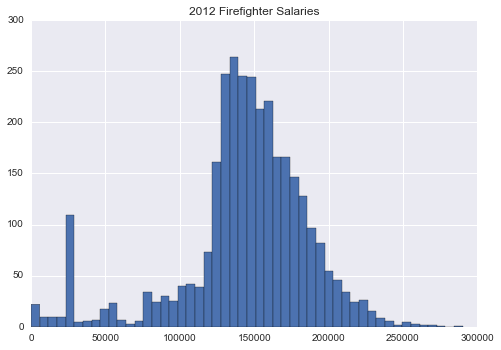

In [22]:
# Histogram of salaries -- one per year perhaps
mask2 = mask & (df["Year"] == 2012)
df[mask].hist(column="TotalPay", bins=50)
plt.title("2012 Firefighter Salaries")
plt.show()

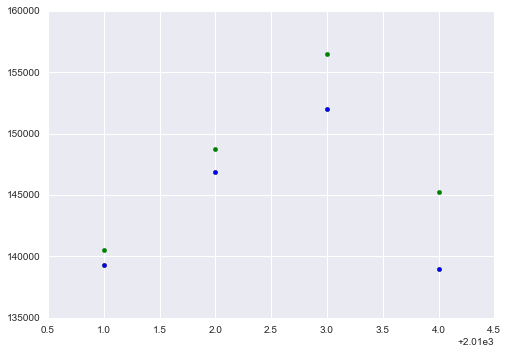

In [10]:
# Look at change over time, mean and median
from scipy import stats
data = []

years = [2011, 2012, 2013, 2014]
for year in years:
    mask2 = mask & (df["Year"] == year)
    mean = np.mean(df[mask2]["TotalPay"])
    median = np.median(df[mask2]["TotalPay"])
    data.append((year, mean, median))

df2 = pd.DataFrame(data, columns=["Year", "Mean", "Median"])    
    
plt.scatter(df2["Year"], df2["Mean"])
plt.scatter(df2["Year"], df2["Median"], color='g')
plt.show()

Model fit: 0.178828111089
Model Coefficients: 2204.3075 -4288432.47
Predicted Median for 2015 153247.1425


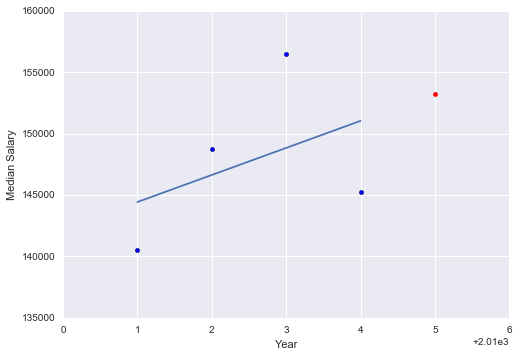

In [20]:
# Fit a model

lm = linear_model.LinearRegression()
X = df2[["Year"]]
y = df2["Median"]
lm.fit(X, y)
predictions = lm.predict(X)
print "Model fit:", lm.score(X, y)
print "Model Coefficients:", lm.coef_[0], lm.intercept_

# Make a prediction for 2015
x1 = 2015
y1 = lm.intercept_ + x * lm.coef_[0]
plt.scatter([x1], [y1], color="r")
print "Predicted Median for 2015", y1

# Plot the data and the best fit line
plt.scatter(X, y)
plt.plot(X, predictions)
plt.xlabel("Year")
plt.ylabel("Median Salary")
plt.show()